# Samin Intisar

## Research question/interests

The goal of my analysis is to find which attributes are dominated by the players based on their positions.

In [1]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import project_functions1 as p1

In [17]:
#Theme
sns.set_theme(context = 'notebook',
                  style = 'darkgrid',
                  palette = 'deep',
                  font = 'sans-serif',
                  font_scale = 1,
                  color_codes = True,
                  rc = None)

### Loading Data

In [2]:
df = p1.load()

df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.00,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.10,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5
2919,2920,Milan ?uri?,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.25,0.29,0.17,0.04,0.00,0.00,3.24,12.40,4.81,72.0


# Cleaning the data

Removing the players that have played fewer than 300 minutes in the entire season. Only keeping forwards, midfielders and defenders for analysis.

In [4]:
df = p1.remove_players(df).reset_index()

df

,index,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,1998,24,...,1.85,0.25,0.86,0.00,0.00,0.00,4.81,2.72,4.94,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2915,2916,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,25.0,1997,26,...,0.05,0.22,0.82,0.00,0.05,0.00,9.18,2.62,2.13,55.2
1494,2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,...,0.10,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0
1495,2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,...,0.00,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4
1496,2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,...,0.10,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5


# Restructuring the data

In [5]:
#Creating new data frames based on player positions
forwards = p1.forwards(df)
midfielders = p1.midfielders(df)
defenders = p1.defenders(df)

# Data frames based on player positions

In [7]:
forwards.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,271.0,0.374317,0.221258,0.00,0.210,0.35,0.505,1.08
Shots,271.0,2.572177,0.725208,0.45,2.095,2.46,3.030,4.86
G/Sh,271.0,0.128635,0.066249,0.00,0.080,0.13,0.170,0.36
Assists,271.0,0.137638,0.131882,0.00,0.040,0.12,0.200,0.83
PasCmp,271.0,18.596162,7.558521,7.11,13.500,16.60,21.150,48.90
Touches,271.0,38.164576,9.486099,20.60,31.450,35.80,42.150,76.30
DriPast,271.0,1.172546,0.761007,0.00,0.610,1.05,1.520,5.29
CarTotDist,271.0,119.661255,67.390379,30.60,70.950,100.50,149.150,381.80
Crs,271.0,0.989041,0.828857,0.00,0.430,0.71,1.360,6.11
GCA,271.0,0.328819,0.210697,0.00,0.180,0.28,0.470,1.13


In [8]:
midfielders.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,454.0,0.082247,0.099088,0.00,0.0000,0.05,0.130,0.61
Shots,454.0,1.088656,0.601857,0.00,0.6700,1.01,1.420,3.15
G/Sh,454.0,0.064273,0.078382,0.00,0.0000,0.05,0.100,0.50
Assists,454.0,0.083568,0.095742,0.00,0.0000,0.06,0.130,0.63
PasCmp,454.0,40.434361,13.394111,14.60,30.6000,38.65,47.875,96.10
Touches,454.0,59.890308,13.118064,27.40,49.9000,58.85,67.975,109.60
DriPast,454.0,0.929163,0.612391,0.00,0.5200,0.79,1.210,4.26
CarTotDist,454.0,190.271366,62.540534,57.40,145.2750,181.95,230.200,398.50
Crs,454.0,0.780727,0.746994,0.00,0.2700,0.56,1.050,4.12
GCA,454.0,0.207269,0.176648,0.00,0.0800,0.17,0.290,0.99


In [9]:
defenders.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,773.0,0.043687,0.063527,0.00,0.00,0.00,0.07,0.50
Shots,773.0,0.560259,0.357065,0.00,0.32,0.51,0.73,2.94
G/Sh,773.0,0.070996,0.103596,0.00,0.00,0.00,0.12,1.00
Assists,773.0,0.050906,0.076271,0.00,0.00,0.00,0.08,0.43
PasCmp,773.0,42.803105,12.791294,16.70,33.50,40.10,49.60,87.20
Touches,773.0,63.148900,12.307331,30.20,54.10,61.20,70.10,105.30
DriPast,773.0,0.542794,0.516187,0.00,0.16,0.39,0.77,4.15
CarTotDist,773.0,196.193790,65.439225,57.70,147.80,187.20,231.30,455.40
Crs,773.0,1.111902,1.200015,0.00,0.09,0.54,1.96,5.95
GCA,773.0,0.113959,0.124473,0.00,0.00,0.08,0.17,0.86


In [10]:
y1 = fw_mean = forwards.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]
y2 = mf_mean = midfielders.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]
y3 = df_mean = defenders.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]

x = np.arange(len(y1))

# Correlation between footballers' attributes

<AxesSubplot:>

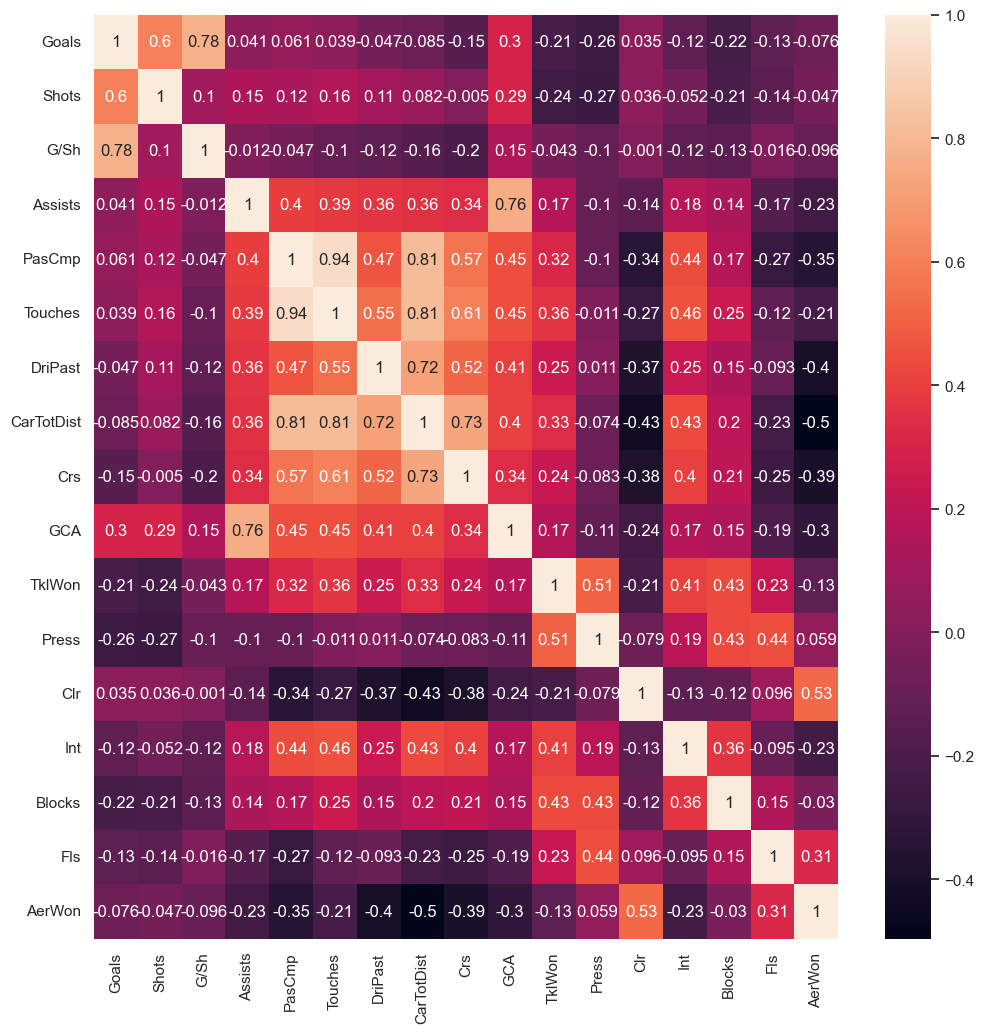

In [18]:
correlation = forwards.corr()

fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(correlation,
            xticklabels = correlation.columns,
            yticklabels = correlation.columns,
            annot = True)

# Visualizing the data to compare the attributes of footballers in each positions

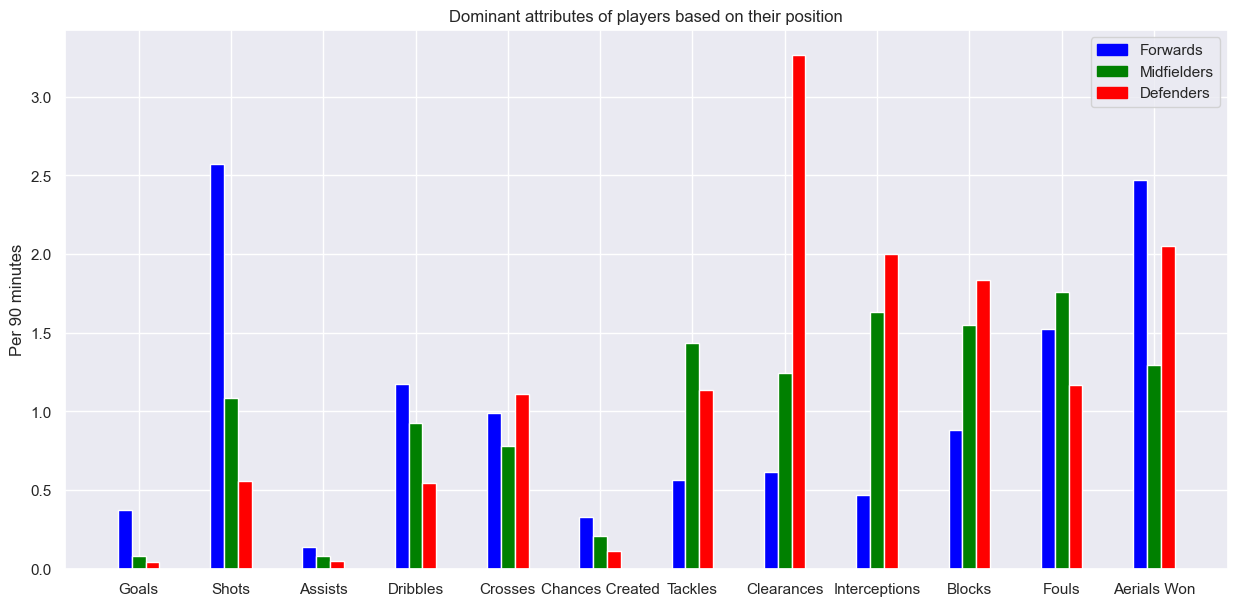

In [19]:
#Bar Plot
f, ax = plt.subplots(figsize=(15,7))
bar_width = 0.15
plt.bar(x, y1, width = bar_width, color = 'blue')
plt.bar(x + bar_width, y2, width = bar_width, color = 'green')
plt.bar(x + bar_width*2, y3, width = bar_width, color = 'red')

#Labels
plt.xticks(x + bar_width, ['Goals', 'Shots', 'Assists', 'Dribbles', 'Crosses', 'Chances Created', 'Tackles', 'Clearances', 'Interceptions', 'Blocks', 'Fouls', 'Aerials Won'])
plt.title('Dominant attributes of players based on their position')
plt.ylabel('Per 90 minutes')

#Legend
colors = {'Forwards':'blue', 'Midfielders':'green', 'Defenders':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

Here we can see that the stats that directly relate to involvement in the goal scoring are dominated by the forwards. The midfielders show prowess in both the attacking and defensive attributes. The more defensive attributes such as tackles, blocks, interceptions and clearances are dominated by the defenders.

### Comparing how much passes are completed by players in each position. Also taking a look at how much distance the players cover with a ball in their feet.

Text(0, 0.5, 'Passes completed per 90 minutes')

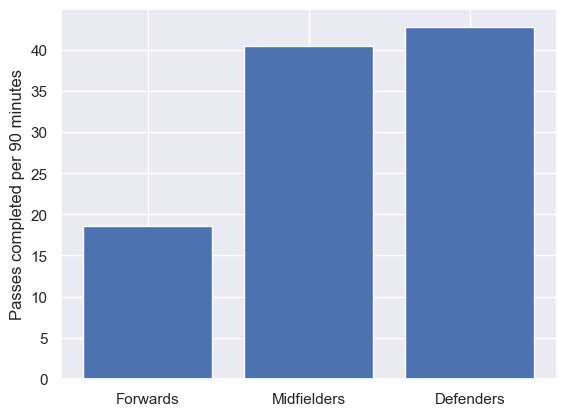

In [20]:
passes = [forwards.PasCmp.mean(), midfielders.PasCmp.mean(), defenders.PasCmp.mean()]
pos = ["Forwards", "Midfielders", "Defenders"]

#Bar plot
plt.bar(x = pos,
        height = passes)

#Labels
plt.ylabel("Passes completed per 90 minutes")

Here we can see that the forwards pass the ball much less than than the midfielders and defenders.

Text(0, 0.5, 'Distance(in yards) traveled with the ball per 90 minutes')

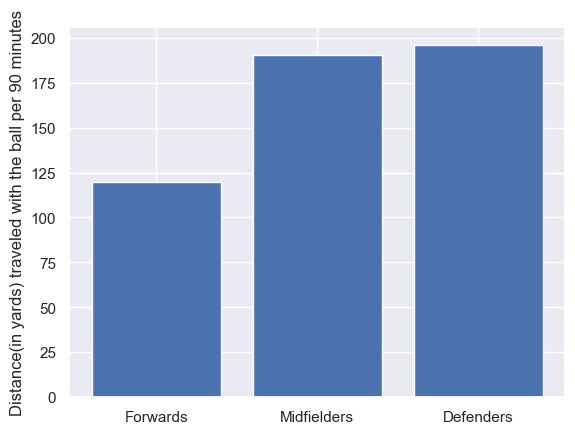

In [21]:
dist = [forwards.CarTotDist.mean(), midfielders.CarTotDist.mean(), defenders.CarTotDist.mean()]
pos = ["Forwards", "Midfielders", "Defenders"]

#Bar plot
plt.bar(x = pos,
        height = dist)

#Labels
plt.ylabel("Distance(in yards) traveled with the ball per 90 minutes")

Here we can see that the bars look quite similar to the passes. Again the forwards are doing much worse than the other two positions.

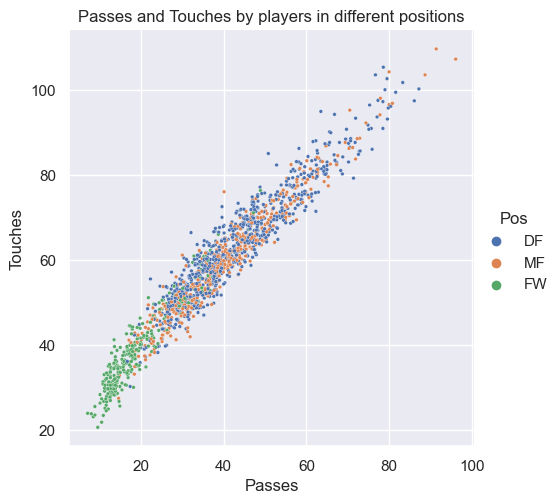

In [22]:
#Scatter Plot
sns.relplot(x = 'PasCmp',
            y = 'Touches',
            hue = 'Pos',
            data = df,
            s = 7).set(xlabel = 'Passes',
                       ylabel = 'Touches',
                       title = 'Passes and Touches by players in different positions')

There is a correlation between the number of touches a players makes in a game and the number of passes they complete. The forwards lag behind in terms of both of these attributes. We can see the scatter points of midfielders and defenders overlapping with each other.

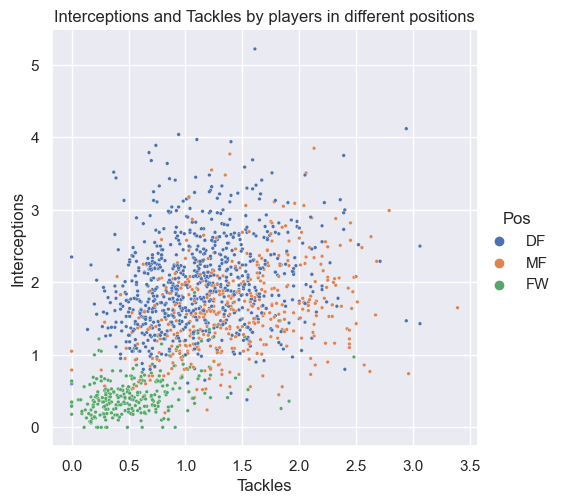

In [23]:
#Scatter Plot
sns.relplot(x = 'TklWon',
            y = 'Int',
            hue = 'Pos',
            data = df,
            s = 7).set(xlabel = 'Tackles',
                       ylabel = 'Interceptions',
                       title = 'Interceptions and Tackles by players in different positions')

Tackles and interceptions are both defensive attributes. We can see that midfielders are involved more in interceptions but defenders are more involved in tackles, while forwards are lagging behind on these attributes again.

### Therefore we can conclude that the forwards have much less involvement in the game than the rest. They spend less time with the ball in their feet. They touch the ball fewer times than everyone else. The defensive stats as well as passes completed are in most cases are equally dominated by the midfielders and defenders. So what we can expect from a football match is that the forwards will be focused fewer times on screen than the rest. However, its the forwards who get the most limelight in the sport because of their goal scoring abilities as that is considered more entertaining. 